In [39]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [40]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\Brend\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
da_ta=pd.read_csv("D:\\Data Analytics Aaron Project Class\\4163 CKD Data Set_1.csv")
da_ta.head()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total.Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
0,1,65,1,0,0,1,1,56.0,162.1,21.31,0,83.6,135,71,48,249,297,0,0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,3,66,1,0,1,0,1,83.9,162.5,31.77,1,113.2,115,57,44,211,255,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,4,54,1,1,0,0,1,69.4,160.5,26.94,0,77.9,110,57,74,156,230,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,6,26,0,1,0,0,1,119.3,193.2,31.96,1,117.9,129,70,43,159,202,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,7,66,0,1,0,0,0,85.1,172.1,28.73,0,99.2,137,92,41,143,184,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [42]:
## Get size of the database, overview of dimension:
print(da_ta.shape)

(4136, 40)


In [43]:
## Get datatype of each column:
da_ta.dtypes

ID                   int64  
Age                  int64  
Female               int64  
Educ                 int64  
Unmarried            int64  
Income               int64  
Insured              int64  
Weight               float64
Height               float64
BMI                  float64
Obese                int64  
Waist                float64
SBP                  int64  
DBP                  int64  
HDL                  int64  
LDL                  int64  
Total.Chol           int64  
Dyslipidemia         int64  
PVD                  int64  
Activity             int64  
PoorVision           int64  
Smoker               int64  
Hypertension         int64  
Fam.Hypertension     int64  
Diabetes             int64  
Fam.Diabetes         int64  
Stroke               int64  
CVD                  int64  
Fam.CVD              int64  
CHF                  int64  
Anemia               int64  
CKD                  int64  
Racegrpblack         int64  
Racegrphispa         int64  
Racegrpother  

In [44]:
# check missing value of each col
da_ta.isnull().sum()

ID                   0
Age                  0
Female               0
Educ                 0
Unmarried            0
Income               0
Insured              0
Weight               0
Height               0
BMI                  0
Obese                0
Waist                0
SBP                  0
DBP                  0
HDL                  0
LDL                  0
Total.Chol           0
Dyslipidemia         0
PVD                  0
Activity             0
PoorVision           0
Smoker               0
Hypertension         0
Fam.Hypertension     0
Diabetes             0
Fam.Diabetes         0
Stroke               0
CVD                  0
Fam.CVD              0
CHF                  0
Anemia               0
CKD                  0
Racegrpblack         0
Racegrphispa         0
Racegrpother         0
Racegrpwhite         0
CareSourceclinic     0
CareSourceDrHMO      0
CareSourcenoplace    0
CareSourceother      0
dtype: int64

In [45]:
## Find out which column's data is not dummy variables:
for i in da_ta.columns:
    print (i,":",len(pd.unique(da_ta[i])))


ID : 4136
Age : 66
Female : 2
Educ : 2
Unmarried : 2
Income : 2
Insured : 2
Weight : 928
Height : 489
BMI : 1870
Obese : 2
Waist : 708
SBP : 127
DBP : 94
HDL : 102
LDL : 249
Total.Chol : 249
Dyslipidemia : 2
PVD : 2
Activity : 4
PoorVision : 2
Smoker : 2
Hypertension : 2
Fam.Hypertension : 2
Diabetes : 2
Fam.Diabetes : 2
Stroke : 2
CVD : 2
Fam.CVD : 2
CHF : 2
Anemia : 2
CKD : 2
Racegrpblack : 2
Racegrphispa : 2
Racegrpother : 2
Racegrpwhite : 2
CareSourceclinic : 2
CareSourceDrHMO : 2
CareSourcenoplace : 2
CareSourceother : 2


In [46]:
# drop id column 
df=da_ta.drop(['ID'],axis=1)

In [47]:
## Check how many data is positive or negative in CKD column:
da_ta['CKD'].value_counts() 

0    3870
1    266 
Name: CKD, dtype: int64

In [48]:
## Check how many times negative nersus positive:
print(sum(da_ta['CKD']==0)/(sum(da_ta['CKD']==1)))
math.ceil(sum(da_ta['CKD']==0)/(sum(da_ta['CKD']==1))) # approx proportion of negative versus positive
## Calculate the proportion to conduct following "negative-to-positive pair training" to avoid training 
##  inbalanced positive and negative sides

14.548872180451127


15

<function matplotlib.pyplot.show(*args, **kw)>

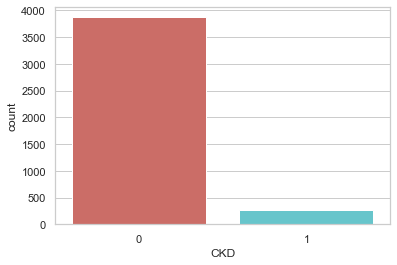

In [49]:
## Exploratory Data Analysis (EDA), show CKD data structure in graph
sns.countplot(x='CKD',data=da_ta, palette='hls')
plt.show

# Encoding-Dummy Transform


In [50]:
## Select out non-dummy columns (features):
non_dummy_list=[]
for i in df.columns:
    if len(pd.unique(df[i]))>2:
        non_dummy_list.append(i)
print(non_dummy_list)

['Age', 'Weight', 'Height', 'BMI', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL', 'Total.Chol', 'Activity']


In [51]:
## Transform dummy variables in "Activity" into dummy:
#wrong code???

##da_ta['new_Activity']=[0]*len(da_ta.columns)
get_med=da_ta.quantile(0.5,0)['Activity']
'''
for n in da_ta['Activity']:
    if n>get_med:
        da_ta['new_Activity'][n]=1
    else: 
        da_ta['new_Activity'][n]=0
'''

"\nfor n in da_ta['Activity']:\n    if n>get_med:\n        da_ta['new_Activity'][n]=1\n    else: \n        da_ta['new_Activity'][n]=0\n"

In [52]:
da_ta['new_Activity'] = da_ta['Activity'].apply(lambda row: 1 if row>get_med else 0)

In [53]:
da_ta['new_Activity'].unique()

array([1, 0], dtype=int64)

In [54]:
non_dummy_list

['Age',
 'Weight',
 'Height',
 'BMI',
 'Waist',
 'SBP',
 'DBP',
 'HDL',
 'LDL',
 'Total.Chol',
 'Activity']

In [55]:
len(non_dummy_list)

11

In [56]:
non_dummy_list.remove('Activity')

In [57]:
print(non_dummy_list)

['Age', 'Weight', 'Height', 'BMI', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL', 'Total.Chol']


In [58]:
df.head()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total.Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
0,65,1,0,0,1,1,56.0,162.1,21.31,0,83.6,135,71,48,249,297,0,0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,66,1,0,1,0,1,83.9,162.5,31.77,1,113.2,115,57,44,211,255,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,54,1,1,0,0,1,69.4,160.5,26.94,0,77.9,110,57,74,156,230,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,26,0,1,0,0,1,119.3,193.2,31.96,1,117.9,129,70,43,159,202,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,66,0,1,0,0,0,85.1,172.1,28.73,0,99.2,137,92,41,143,184,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [59]:
df[non_dummy_list].median()

Age           46.000 
Weight        77.400 
Height        167.450
BMI           27.295 
Waist         96.500 
SBP           121.000
DBP           72.000 
HDL           49.000 
LDL           149.000
Total.Chol    200.000
dtype: float64

In [60]:
## Transform each non-dummy variables into dummy variables and add corresponded new columns into dataframe da_ta
for fea in non_dummy_list:
    med=da_ta.quantile(0.5,0)[fea]
    da_ta['new_'+fea] = da_ta[fea].apply(lambda r: 1 if r>med else 0)

In [61]:
da_ta.head()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total.Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother,new_Activity,new_Age,new_Weight,new_Height,new_BMI,new_Waist,new_SBP,new_DBP,new_HDL,new_LDL,new_Total.Chol
0,1,65,1,0,0,1,1,56.0,162.1,21.31,0,83.6,135,71,48,249,297,0,0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1
1,3,66,1,0,1,0,1,83.9,162.5,31.77,1,113.2,115,57,44,211,255,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1
2,4,54,1,1,0,0,1,69.4,160.5,26.94,0,77.9,110,57,74,156,230,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1
3,6,26,0,1,0,0,1,119.3,193.2,31.96,1,117.9,129,70,43,159,202,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1
4,7,66,0,1,0,0,0,85.1,172.1,28.73,0,99.2,137,92,41,143,184,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0


In [62]:
da_ta.shape

(4136, 51)

In [63]:
# check the types of variables in new columns: Why Categorical data? 为什么新的列出来要是categorical比较好?
da_ta.dtypes

ID                   int64  
Age                  int64  
Female               int64  
Educ                 int64  
Unmarried            int64  
Income               int64  
Insured              int64  
Weight               float64
Height               float64
BMI                  float64
Obese                int64  
Waist                float64
SBP                  int64  
DBP                  int64  
HDL                  int64  
LDL                  int64  
Total.Chol           int64  
Dyslipidemia         int64  
PVD                  int64  
Activity             int64  
PoorVision           int64  
Smoker               int64  
Hypertension         int64  
Fam.Hypertension     int64  
Diabetes             int64  
Fam.Diabetes         int64  
Stroke               int64  
CVD                  int64  
Fam.CVD              int64  
CHF                  int64  
Anemia               int64  
CKD                  int64  
Racegrpblack         int64  
Racegrphispa         int64  
Racegrpother  

In [64]:
print(non_dummy_list)

['Age', 'Weight', 'Height', 'BMI', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL', 'Total.Chol']


In [65]:
non_dummy_list.append('Activity')

In [66]:
non_dummy=np.asarray(non_dummy_list)
da_ta.drop(non_dummy,axis=1)

,ID,Female,Educ,Unmarried,Income,Insured,Obese,Dyslipidemia,PVD,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother,new_Activity,new_Age,new_Weight,new_Height,new_BMI,new_Waist,new_SBP,new_DBP,new_HDL,new_LDL,new_Total.Chol
0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1
1,3,1,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1
2,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1
3,6,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1
4,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,5996,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1
4132,5997,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0
4133,5998,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0
4134,5999,0,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0


In [67]:
## drop original col to create a new dummy dataframe:
df_dummy=da_ta.drop(non_dummy,axis=1)

In [68]:
# confirm every features are dummy variables:
for entry in df_dummy.columns:
        print(entry+':'+ str(len(da_ta[entry].unique())))

ID:4136
Female:2
Educ:2
Unmarried:2
Income:2
Insured:2
Obese:2
Dyslipidemia:2
PVD:2
PoorVision:2
Smoker:2
Hypertension:2
Fam.Hypertension:2
Diabetes:2
Fam.Diabetes:2
Stroke:2
CVD:2
Fam.CVD:2
CHF:2
Anemia:2
CKD:2
Racegrpblack:2
Racegrphispa:2
Racegrpother:2
Racegrpwhite:2
CareSourceclinic:2
CareSourceDrHMO:2
CareSourcenoplace:2
CareSourceother:2
new_Activity:2
new_Age:2
new_Weight:2
new_Height:2
new_BMI:2
new_Waist:2
new_SBP:2
new_DBP:2
new_HDL:2
new_LDL:2
new_Total.Chol:2


In [69]:
df_dummy.dtypes

ID                   int64
Female               int64
Educ                 int64
Unmarried            int64
Income               int64
Insured              int64
Obese                int64
Dyslipidemia         int64
PVD                  int64
PoorVision           int64
Smoker               int64
Hypertension         int64
Fam.Hypertension     int64
Diabetes             int64
Fam.Diabetes         int64
Stroke               int64
CVD                  int64
Fam.CVD              int64
CHF                  int64
Anemia               int64
CKD                  int64
Racegrpblack         int64
Racegrphispa         int64
Racegrpother         int64
Racegrpwhite         int64
CareSourceclinic     int64
CareSourceDrHMO      int64
CareSourcenoplace    int64
CareSourceother      int64
new_Activity         int64
new_Age              int64
new_Weight           int64
new_Height           int64
new_BMI              int64
new_Waist            int64
new_SBP              int64
new_DBP              int64
n

# First-round Filter Features (using Bayes Thinking):

In [70]:
# filter CKD==1 and drop CKD Col
CKD_pos=df_dummy[df_dummy["CKD"]==1]

In [71]:
ckd=CKD_pos.drop(["CKD","ID"],axis=1)

In [72]:
## 算出得CKD的人里面有各种特征的可能性是多少:
prob_ckd=[]
for i in ckd.columns:
    prob_ckd.append(ckd[i].mean())

In [73]:
print(prob_ckd)

[0.5375939849624061, 0.34962406015037595, 0.4398496240601504, 0.2819548872180451, 0.9661654135338346, 0.34962406015037595, 0.10526315789473684, 0.14285714285714285, 0.13909774436090225, 0.39849624060150374, 0.793233082706767, 0.18421052631578946, 0.2857142857142857, 0.3458646616541353, 0.11278195488721804, 0.22932330827067668, 0.2631578947368421, 0.08646616541353383, 0.03007518796992481, 0.16541353383458646, 0.11278195488721804, 0.015037593984962405, 0.706766917293233, 0.20300751879699247, 0.7105263157894737, 0.03383458646616541, 0.05263157894736842, 0.08646616541353383, 0.9511278195488722, 0.5225563909774437, 0.45864661654135336, 0.5451127819548872, 0.6541353383458647, 0.7706766917293233, 0.40977443609022557, 0.39097744360902253, 0.5451127819548872, 0.518796992481203]


In [74]:
## 把各个特征值和 得CKD-positive时有它们的几率 对应起来做表:
df_prob_ckd=pd.DataFrame(zip(ckd.columns,prob_ckd))
df_prob_ckd.columns=['features','likelihood_ckd']
df_prob_ckd

,features,likelihood_ckd
0,Female,0.537594
1,Educ,0.349624
2,Unmarried,0.439850
3,Income,0.281955
4,Insured,0.966165
5,Obese,0.349624
6,Dyslipidemia,0.105263
7,PVD,0.142857
8,PoorVision,0.139098
9,Smoker,0.398496


In [75]:
df_dummy_noid=df_dummy.drop(['ID'],axis=1)

In [76]:
## 算出有这个feature的人中 得CKD-positive的几率:
pro_feature=[]
for col in df_dummy_noid.columns:
    prob=df_dummy_noid[df_dummy_noid[col]==1].CKD.mean()
    pro_feature.append(prob)
    df_pro_feature=pd.DataFrame(zip(df_dummy_noid.columns,pro_feature))

In [77]:
df_pro_feature.columns=['features','likelihood_feature']

In [78]:
df_pro_feature

,features,likelihood_feature
0,Female,0.066948
1,Educ,0.047595
2,Unmarried,0.081306
3,Income,0.040628
4,Insured,0.076694
5,Obese,0.072543
6,Dyslipidemia,0.065268
7,PVD,0.269504
8,PoorVision,0.166667
9,Smoker,0.083927


In [79]:
## inner join 两个对应feature（ key） 的表格，形成三列的表:
df_prob=pd.merge(left=df_prob_ckd,right=df_pro_feature,on='features')

In [80]:
df_prob

,features,likelihood_ckd,likelihood_feature
0,Female,0.537594,0.066948
1,Educ,0.349624,0.047595
2,Unmarried,0.439850,0.081306
3,Income,0.281955,0.040628
4,Insured,0.966165,0.076694
5,Obese,0.349624,0.072543
6,Dyslipidemia,0.105263,0.065268
7,PVD,0.142857,0.269504
8,PoorVision,0.139098,0.166667
9,Smoker,0.398496,0.083927


In [81]:
## Apply Bayes Analysis Thinking: multiply the calculated two prob column values:
##新增一列是两列probs相乘的结果:
df_prob['likelihood_combine']=df_prob['likelihood_ckd']*df_prob['likelihood_feature']

In [82]:
df_prob

,features,likelihood_ckd,likelihood_feature,likelihood_combine
0,Female,0.537594,0.066948,0.035991
1,Educ,0.349624,0.047595,0.016640
2,Unmarried,0.439850,0.081306,0.035763
3,Income,0.281955,0.040628,0.011455
4,Insured,0.966165,0.076694,0.074099
5,Obese,0.349624,0.072543,0.025363
6,Dyslipidemia,0.105263,0.065268,0.006870
7,PVD,0.142857,0.269504,0.038501
8,PoorVision,0.139098,0.166667,0.023183
9,Smoker,0.398496,0.083927,0.033445


In [83]:
# look at first highest prob 15 features 从第一张表里面选出得 CKD-positive的人里面比例最高的几个features
# 为什么选 15个？ -> 因为方便使用
df_prob.sort_values('likelihood_feature',ascending=False)[0:20][['features','likelihood_feature']]

,features,likelihood_feature
14,Stroke,0.297030
7,PVD,0.269504
15,CVD,0.262931
17,CHF,0.250000
12,Diabetes,0.176334
8,PoorVision,0.166667
10,Hypertension,0.134824
28,new_Age,0.126754
18,Anemia,0.102564
33,new_SBP,0.101435


In [84]:
## 这里出来的 likelihood_feature selection对应下面Model-3的结果
liki_fea_selec=df_prob.sort_values('likelihood_feature',ascending=False)[0:20][['features','likelihood_feature']]
liki_fea=liki_fea_selec['features'].tolist()
selected_likilen=len(liki_fea)
for i in range(selected_likilen):
    if liki_fea[i]=='new_Age':
        liki_fea[i]='Age'
    elif liki_fea[i]=='new_SBP':
        liki_fea[i]='SBP'
    elif liki_fea[i]== 'new_Waist':
        liki_fea[i]='Waist'
    elif liki_fea[i]== 'new_LDL':
        liki_fea[i]='LDL'
    
print(liki_fea)

['Stroke', 'PVD', 'CVD', 'CHF', 'Diabetes', 'PoorVision', 'Hypertension', 'Age', 'Anemia', 'SBP', 'Racegrpwhite', 'Waist', 'Smoker', 'Unmarried', 'CareSourceDrHMO', 'Insured', 'Obese', 'CareSourceother', 'Fam.Diabetes', 'LDL']


In [85]:
## look at first highest prob 15 features in likelihood_combine col; 同理在combine 2个prob的值里面选出最高的前15个，综合2个值筛选出初步的significant features:
df_prob.sort_values('likelihood_combine',ascending=False)[0:20][['features','likelihood_combine']]

,features,likelihood_combine
28,new_Age,0.120559
10,Hypertension,0.106947
33,new_SBP,0.078174
4,Insured,0.074099
22,Racegrpwhite,0.060369
15,CVD,0.060296
32,new_Waist,0.055252
24,CareSourceDrHMO,0.054656
12,Diabetes,0.050381
36,new_LDL,0.038632


In [86]:
## 这里出来的 comb feature selection对应下面Model-2的结果
comb_fea_selec=df_prob.sort_values('likelihood_combine',ascending=False)[0:20][['features','likelihood_combine']]
comb_fea=comb_fea_selec['features'].tolist()
selected_comblen=len(comb_fea)
for i in range(selected_comblen):
    if comb_fea[i]=='new_Age':
        comb_fea[i]='Age'
    elif comb_fea[i]=='new_SBP':
        comb_fea[i]='SBP'
    elif comb_fea[i]== 'new_Waist':
        comb_fea[i]='Waist'
    elif comb_fea[i]== 'new_LDL':
        comb_fea[i]='LDL'
    elif comb_fea[i]== 'new_BMI':
        comb_fea[i]='BMI'
    elif comb_fea[i]== 'new_Weight':
        comb_fea[i]='Weight' 
    elif comb_fea[i]== 'new_Total.Chol':
        comb_fea[i]='Total.Chol'
    elif comb_fea[i]=='new_Height':
        comb_fea[i]='Height'
print(comb_fea)

['Age', 'Hypertension', 'SBP', 'Insured', 'Racegrpwhite', 'CVD', 'Waist', 'CareSourceDrHMO', 'Diabetes', 'LDL', 'PVD', 'BMI', 'Female', 'Unmarried', 'Weight', 'Total.Chol', 'Stroke', 'Smoker', 'Height', 'Obese']


In [87]:
## inner join two tables above to get the common significant features:
first_table=df_prob.sort_values('likelihood_feature',ascending=False)[0:20][['features','likelihood_feature']]
second_table=df_prob.sort_values('likelihood_combine',ascending=False)[0:20][['features','likelihood_combine']]
result1 = pd.merge(first_table,second_table,on='features')
result1

,features,likelihood_feature,likelihood_combine
0,Stroke,0.297030,0.033500
1,PVD,0.269504,0.038501
2,CVD,0.262931,0.060296
3,Diabetes,0.176334,0.050381
4,Hypertension,0.134824,0.106947
5,new_Age,0.126754,0.120559
6,new_SBP,0.101435,0.078174
7,Racegrpwhite,0.085416,0.060369
8,new_Waist,0.084466,0.055252
9,Smoker,0.083927,0.033445


In [88]:
result1['features'].tolist()

['Stroke',
 'PVD',
 'CVD',
 'Diabetes',
 'Hypertension',
 'new_Age',
 'new_SBP',
 'Racegrpwhite',
 'new_Waist',
 'Smoker',
 'Unmarried',
 'CareSourceDrHMO',
 'Insured',
 'Obese',
 'new_LDL']

In [89]:
## First round significant feature selection, using Bayes Thinking: (I used common significant features from the above 2 tables)  --->这里出的结果对应下面的Model-1部分
fst_selected_fea=result1['features'].tolist()
selected_len=len(fst_selected_fea)
for i in range(selected_len):
    if fst_selected_fea[i]=='new_Age':
        fst_selected_fea[i]='Age'
    elif fst_selected_fea[i]=='new_SBP':
        fst_selected_fea[i]='SBP'
    elif fst_selected_fea[i]== 'new_Waist':
        fst_selected_fea[i]='Waist'
    elif fst_selected_fea[i]== 'new_LDL':
        fst_selected_fea[i]='LDL'
print(fst_selected_fea)


['Stroke', 'PVD', 'CVD', 'Diabetes', 'Hypertension', 'Age', 'SBP', 'Racegrpwhite', 'Waist', 'Smoker', 'Unmarried', 'CareSourceDrHMO', 'Insured', 'Obese', 'LDL']


# Second-round Feature Preprocessing (normal distributed & similar variance):

In [90]:
#load original data again (因为之前有过删减处理dummy的过程，数据可能不完整呈现)
## Continuous variables must be better than non-continuous(discrete variables) - continuous variables have more detailed info, thus must go back to reanalyze original dataset
## Simply transferring all the features into dummy variables in the first step would cause inaccurate filteration of significant features
df2=pd.read_csv("D:\\Data Analytics Aaron Project Class\\4163 CKD Data Set_1.csv")
df2.head()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total.Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
0,1,65,1,0,0,1,1,56.0,162.1,21.31,0,83.6,135,71,48,249,297,0,0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,3,66,1,0,1,0,1,83.9,162.5,31.77,1,113.2,115,57,44,211,255,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,4,54,1,1,0,0,1,69.4,160.5,26.94,0,77.9,110,57,74,156,230,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,6,26,0,1,0,0,1,119.3,193.2,31.96,1,117.9,129,70,43,159,202,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,7,66,0,1,0,0,0,85.1,172.1,28.73,0,99.2,137,92,41,143,184,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [91]:
df2=df2.drop('ID',axis=1)

In [92]:
## Check variance of each features in the original table:
df2.var()

Age                  330.931916 
Female               0.249790   
Educ                 0.249301   
Unmarried            0.226927   
Income               0.247179   
Insured              0.153811   
Weight               368.011677 
Height               100.421709 
BMI                  37.317719  
Obese                0.213937   
Waist                229.725963 
SBP                  401.445712 
DBP                  147.855385 
HDL                  246.894918 
LDL                  1787.429386
Total.Chol           1765.527074
Dyslipidemia         0.092987   
PVD                  0.032937   
Activity             0.646629   
PoorVision           0.050806   
Smoker               0.212169   
Hypertension         0.235267   
Fam.Hypertension     0.189107   
Diabetes             0.093370   
Fam.Diabetes         0.215212   
Stroke               0.023829   
CVD                  0.052959   
Fam.CVD              0.229290   
CHF                  0.021754   
Anemia               0.018508   
CKD       

In [93]:
## Why we going to check feature variance? -> unfair to train variables at different scales
## Large variance would derive from huge differences between individual data points or large data values ( incompatible with dummy variables only with 0 or 1)

In [94]:
#filter continious columns normally with variance greater than 1
conti_col=df2.columns[df2.var()>1]
conti_col

Index(['Age', 'Weight', 'Height', 'BMI', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL',
       'Total.Chol'],
      dtype='object')

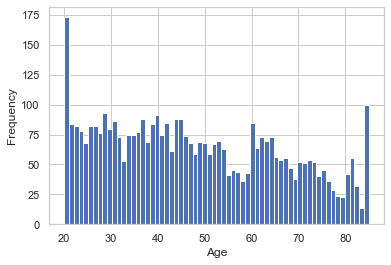

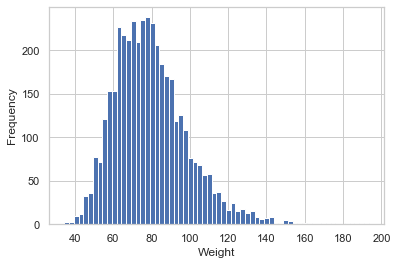

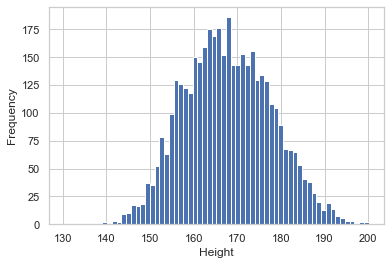

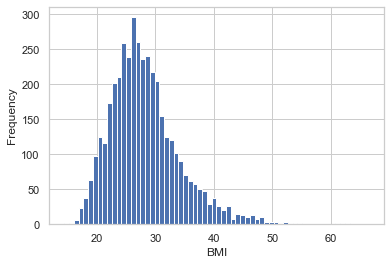

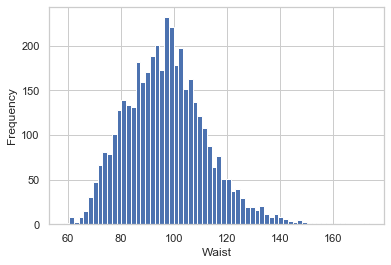

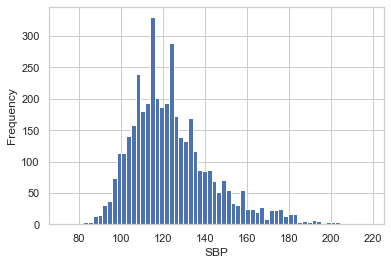

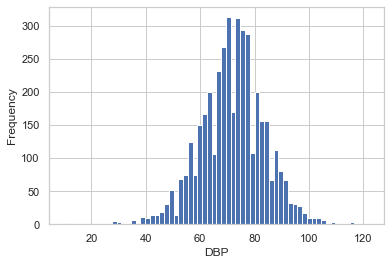

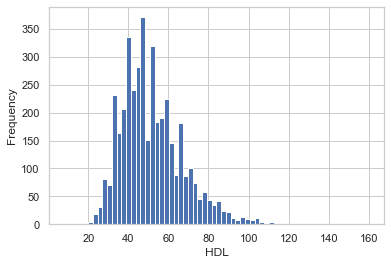

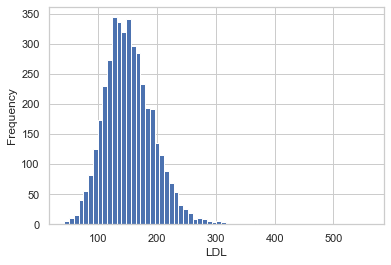

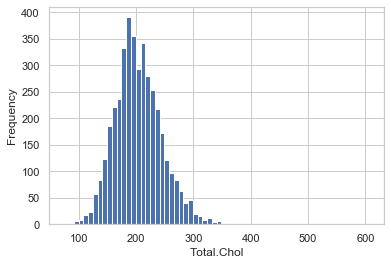

In [95]:
## Check all the continuous features' distribution
# In histo, “bin” the range of values — divide the entire range of values into a series of intervals — and then count how many values fall into each interval
# Why set bins here as a sqrt of sample size?
bins_=int(round(np.sqrt(df2.shape[0])))
for col in conti_col:
    df2[col].plot(kind='hist',bins=bins_)
    plt.xlabel(col)
    plt.show()

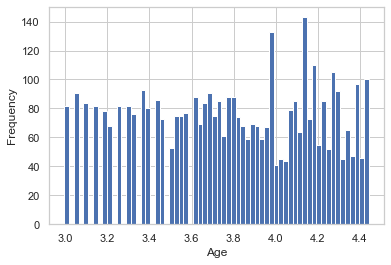

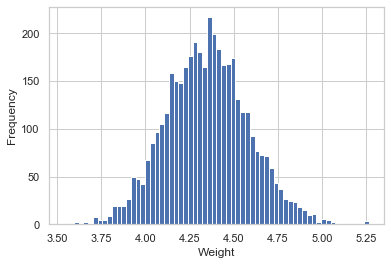

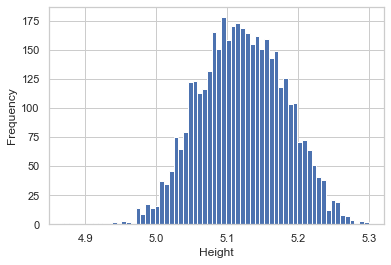

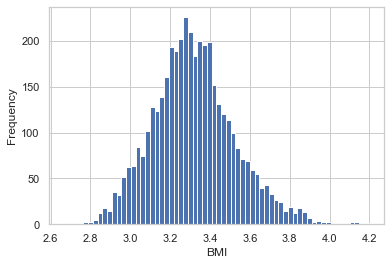

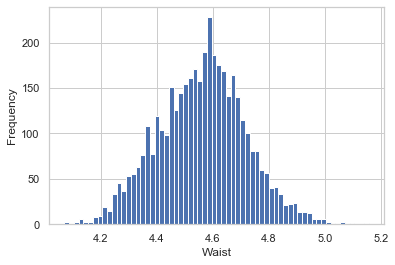

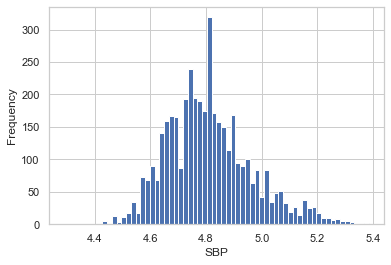

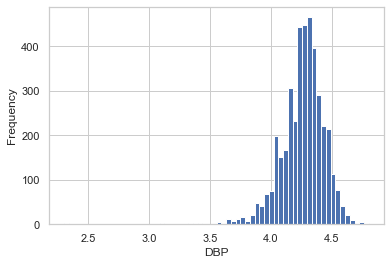

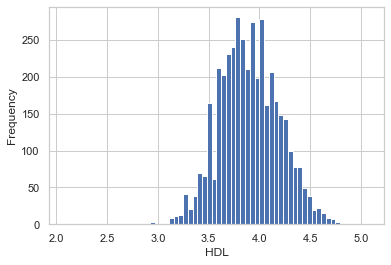

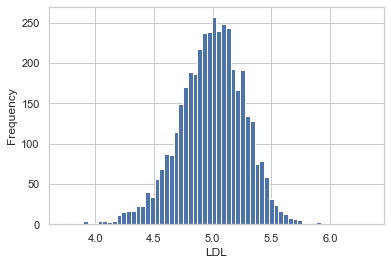

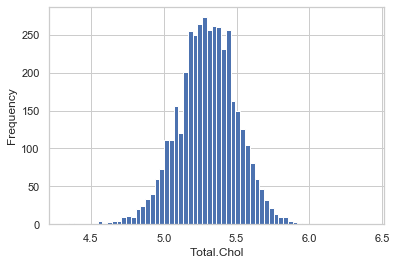

In [96]:
# log these features to make sure all the feature data points better follow a normal distributions, (log them and std them)
## Assuming the original data follows log normal distribution-> so log it to be normal 
# 我在想这一步可以不用做，因为我觉得一开始make assumption as log normal 也不一定成立？
for col in conti_col:
    np.log(df2[col]).plot(kind='hist',bins=bins_)
    plt.xlabel(col)
    plt.show()

In [97]:
## 对于为什么用log，什么assumption 下用log呈现更好的normal dustribution 还是不理解
df_log=df2.copy()
df_log[conti_col]=np.log(df_log[conti_col])

In [98]:
df_log[conti_col].head()

,Age,Weight,Height,BMI,Waist,SBP,DBP,HDL,LDL,Total.Chol
0,4.174387,4.025352,5.088213,3.059176,4.426044,4.905275,4.262680,3.871201,5.517453,5.693732
1,4.189655,4.429626,5.090678,3.458522,4.729156,4.744932,4.043051,3.784190,5.351858,5.541264
2,3.988984,4.239887,5.078294,3.293612,4.355426,4.700480,4.043051,4.304065,5.049856,5.438079
3,3.258097,4.781641,5.263726,3.464485,4.769837,4.859812,4.248495,3.761200,5.068904,5.308268
4,4.189655,4.443827,5.148076,3.357942,4.597138,4.919981,4.521789,3.713572,4.962845,5.214936


In [99]:
df_log[conti_col].var() #能简单感觉出log对于把continuous variables variances化到接近很有效

Age           0.161864
Weight        0.054611
Height        0.003567
BMI           0.042287
Waist         0.024150
SBP           0.023458
DBP           0.035502
HDL           0.086697
LDL           0.079759
Total.Chol    0.042197
dtype: float64

In [100]:
# first split data into training and test, since we cannot standardize the whole data at the same time ???
y=df_log.CKD
X=df_log.drop('CKD',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y,test_size=0.2, random_state=42)   #'stratify=y' means stratified sampling
                                                       # random_state ~ fix the training and test data

In [101]:
# standardize continous features:
X_train_std=X_train.copy()
X_test_std=X_test.copy()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train[conti_col]) #don't cheat, fit on X_train then applied the same transformation on X_test
X_train_std[conti_col]=scaler.transform(X_train[conti_col]) #transform into dataframe
X_test_std[conti_col]=scaler.transform(X_test[conti_col])

# every continious features have the same std in the training data set
X_train_std.std().sort_values(ascending=False)

SBP                  1.000151
Waist                1.000151
LDL                  1.000151
Total.Chol           1.000151
HDL                  1.000151
Height               1.000151
BMI                  1.000151
Age                  1.000151
Weight               1.000151
DBP                  1.000151
Activity             0.810983
Female               0.499628
Educ                 0.499335
Racegrpwhite         0.498780
Income               0.496972
CareSourceDrHMO      0.490627
Hypertension         0.484776
Fam.CVD              0.480954
Unmarried            0.475611
Obese                0.464584
Fam.Diabetes         0.462875
Smoker               0.460100
Racegrphispa         0.443530
Fam.Hypertension     0.439511
CareSourceclinic     0.405924
Insured              0.390794
Racegrpblack         0.371830
CareSourcenoplace    0.355578
Diabetes             0.307633
Dyslipidemia         0.305294
CVD                  0.229226
PoorVision           0.222660
CareSourceother      0.211363
PVD       

In [102]:
# in test data, they have different variance since we use the std and mean of training data to standardize test ??? 不太了解这个调用的包都在做些什么？
X_test_std.var().sort_values(ascending=False)

Age                  1.046209
HDL                  1.017569
SBP                  0.997548
BMI                  0.981009
Weight               0.979769
Total.Chol           0.971326
DBP                  0.969712
Waist                0.964973
LDL                  0.936125
Height               0.933164
Activity             0.602859
Female               0.250296
Racegrpwhite         0.250016
Educ                 0.249461
Income               0.248194
CareSourceDrHMO      0.243349
Hypertension         0.236562
Unmarried            0.229968
Fam.CVD              0.220439
Fam.Diabetes         0.219173
Smoker               0.214306
Racegrphispa         0.206088
Obese                0.206088
Fam.Hypertension     0.171699
CareSourceclinic     0.166884
Insured              0.158297
Racegrpblack         0.134990
CareSourcenoplace    0.133342
Dyslipidemia         0.092230
Diabetes             0.088363
PoorVision           0.055744
CVD                  0.054676
CareSourceother      0.043840
Racegrpoth

In [103]:
## Normalize continous features and 'Activity' into range (1,0), 
## so that all the features are in the same range, 
## and the effect of variance difference will be be very minor
X_train_norm=X_train.copy()
X_test_norm=X_test.copy()

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train[list(conti_col)+['Activity']]) 
X_train_norm[list(conti_col)+['Activity']]=scaler.transform(X_train[list(conti_col)+['Activity']]) 
X_test_norm[list(conti_col)+['Activity']]=scaler.transform(X_test[list(conti_col)+['Activity']])

In [104]:
# in the training dataset, the variance differences among different features are very minor
X_train_norm.var().sort_values(ascending=False)

Female               0.249628
Educ                 0.249335
Racegrpwhite         0.248781
Income               0.246981
CareSourceDrHMO      0.240715
Hypertension         0.235008
Fam.CVD              0.231317
Unmarried            0.226206
Obese                0.215838
Fam.Diabetes         0.214254
Smoker               0.211692
Racegrphispa         0.196719
Fam.Hypertension     0.193170
CareSourceclinic     0.164775
Insured              0.152720
Racegrpblack         0.138258
CareSourcenoplace    0.126435
Diabetes             0.094638
Dyslipidemia         0.093205
Age                  0.076623
Activity             0.073077
CVD                  0.052545
PoorVision           0.049577
CareSourceother      0.044674
PVD                  0.034690
Racegrpother         0.028472
Stroke               0.024181
CHF                  0.021587
Waist                0.020668
Height               0.019858
SBP                  0.019614
Weight               0.018464
BMI                  0.018181
Anemia    

# Feature Selection Based on Different Preprocessing Methods:


In [105]:
## Using y-train for training and y-test for testing
first_round_select=fst_selected_fea
print(first_round_select)

['Stroke', 'PVD', 'CVD', 'Diabetes', 'Hypertension', 'Age', 'SBP', 'Racegrpwhite', 'Waist', 'Smoker', 'Unmarried', 'CareSourceDrHMO', 'Insured', 'Obese', 'LDL']


# Apply Logististic Regression Model

## Model-1 (log & first round selected significant features- final join)

In [107]:
# model-1 (log & first round selected significant features- final join) -> 是Bayes乘出来的结果和 (bayes乘+CKD-positive每个feature的几率 那张表join出来的features)
import statsmodels.api as sm
x = sm.add_constant(X_train[first_round_select]) #fea_prob_col_ori
model1 = sm.Logit(y_train, x)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.168562
         Iterations 9


In [108]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.2944
Time:                        20:15:06   Log-Likelihood:                -557.60
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 1.269e-89
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.1994      4.591     -4.182      0.000     -28.198     -10.201
Stroke              0.2014      0.378      0.532      0.595      -0.540       0.943
PVD                 0.7243      

In [109]:
result1.pvalues[result1.pvalues<0.05]

const           2.892918e-05
PVD             2.130323e-03
CVD             2.361571e-02
Diabetes        5.087346e-03
Hypertension    8.879513e-04
Age             1.258240e-24
Racegrpwhite    1.275998e-02
dtype: float64

In [122]:
model1select_fea=['PVD','CVD','Diabetes','Hypertension','Age','Racegrpwhite']

## Model-2 (log & first round selected significant features-Combine table selected)

In [111]:
# model (log & first round selected significant features-Combine table selected) ->bayes乘出来的 features的那张表
import statsmodels.api as sm
x = sm.add_constant(X_train[comb_fea]) #fea_prob_col_ori
model2 = sm.Logit(y_train, x)
result2 = model2.fit()

         Current function value: 0.195256
         Iterations: 35


C:\Users\Brend\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [112]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3287
Method:                           MLE   Df Model:                           20
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.1826
Time:                        20:16:19   Log-Likelihood:                -645.91
converged:                      False   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 1.705e-49
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.885e+04   8916.564     -9.964      0.000   -1.06e+05   -7.14e+04
Age                 6.0191      0.582     10.345      0.000       4.879       7.159
Hypertension        0.7343      

In [113]:
result2.pvalues[result2.pvalues<0.05]

const           2.180216e-23
Age             4.388509e-25
Hypertension    1.343176e-03
CVD             4.219108e-02
Diabetes        4.114465e-02
LDL             2.791947e-04
PVD             2.363989e-04
BMI             2.280823e-23
Female          1.386232e-03
Weight          2.267660e-23
Total.Chol      1.885534e-04
Height          2.208379e-23
dtype: float64

In [119]:
model2select_fea=['Age','CVD','Diabetes','Hypertension','LDL','PVD','BMI','Female','Weight','Total.Chol','Height']

## Model-3 (log & first round selected significant features-Only from "the prob of CKD=1" in each feature table)

In [114]:
# model (log & first round selected significant features-Only from "the prob of CKD=1" in each feature table) ->看每个feature里面CKD=1的那张表
import statsmodels.api as sm
x = sm.add_constant(X_train[liki_fea]) #fea_prob_col_ori
model3 = sm.Logit(y_train, x)
result3 = model3.fit()

Optimization terminated successfully.
         Current function value: 0.166996
         Iterations 9


In [115]:
print(result3.summary())

                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3287
Method:                           MLE   Df Model:                           20
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.3009
Time:                        20:18:25   Log-Likelihood:                -552.42
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 3.743e-88
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.4761      4.619     -4.217      0.000     -28.529     -10.423
Stroke              0.2636      0.382      0.690      0.490      -0.485       1.012
PVD                 0.7138      

In [116]:
result3.pvalues[result3.pvalues<0.05]

const           2.480588e-05
PVD             2.640973e-03
Diabetes        3.109890e-03
Hypertension    5.535041e-04
Age             4.779540e-24
Anemia          2.006031e-02
Racegrpwhite    9.825978e-03
dtype: float64

In [120]:
model3select_fea=['PVD','Anemia','Diabetes','Hypertension','Age','Racegrpwhite']

# EasyEnsemble Modeling & Evaluate Model Performance

In [ ]:
# install -U imbalanced-learn packge if you do not have it
!pip install -U imbalanced-learn

In [ ]:
# install scikit-learn packages if you do not have it
!pip install scikit-learn

In [ ]:
#instanll scikit-plot packges if you do not have it
#conda install -c conda-forge scikit-plot
!pip install -U scikit-learn
!pip install scikit-plot

In [117]:
from imblearn.ensemble import EasyEnsembleClassifier 
from collections import Counter
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

In [123]:
# Log + fea_model
clf1 = LogisticRegression()
eec1 = EasyEnsembleClassifier(base_estimator=clf1,replacement=False,n_estimators=14,random_state=2)
eec1.fit(X_train[model1select_fea], y_train) # choose the features for training and test at the same time
y_pred1 = eec1.predict(X_test[model1select_fea])

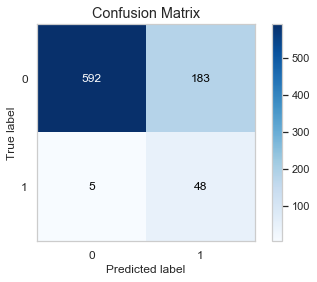

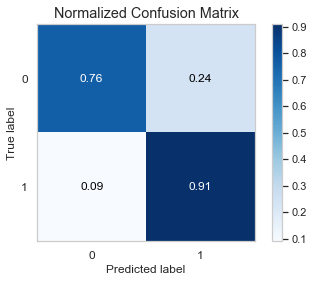

In [124]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True)
plt.show()

In [125]:
# Summary report, we should focus on recall and weighted f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.21      0.91      0.34        53

    accuracy                           0.77       828
   macro avg       0.60      0.83      0.60       828
weighted avg       0.94      0.77      0.83       828



In [127]:
# log + fea_model2
clf2 = LogisticRegression()
eec2 = EasyEnsembleClassifier(base_estimator=clf2,replacement=False,n_estimators=14,random_state=2)
eec2.fit(X_train[model2select_fea], y_train) # choose the features for training and test at the same time
y_pred2 = eec2.predict(X_test[model2select_fea])

C:\Users\Brend\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Brend\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [128]:
# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred2, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       775
           1       0.21      0.98      0.34        53

    accuracy                           0.76       828
   macro avg       0.60      0.86      0.60       828
weighted avg       0.95      0.76      0.82       828



In [131]:
# log + fea_model3
clf3 = LogisticRegression()
eec3 = EasyEnsembleClassifier(base_estimator=clf3,replacement=True,n_estimators=14,random_state=2)
eec3.fit(X_train[model3select_fea], y_train) # choose the features for training and test at the same time
y_pred3 = eec3.predict(X_test[model3select_fea])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred3, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.21      0.92      0.34        53

    accuracy                           0.77       828
   macro avg       0.60      0.84      0.60       828
weighted avg       0.94      0.77      0.83       828



# Compare Three Models

In [132]:
# get the probabilities
y_pred_prob1 = eec1.predict_proba(X_test[model1select_fea])
y_pred_prob2 = eec2.predict_proba(X_test_norm[model2select_fea])
y_pred_prob3 = eec3.predict_proba(X_test_norm[model3select_fea])

In [134]:
# only get CKD=1 probabilities
prob1=eec1.predict_proba(X_test_norm[model1select_fea])[::,1]
prob2=eec2.predict_proba(X_test_norm[model2select_fea])[::,1]
prob3=eec3.predict_proba(X_test_norm[model3select_fea])[::,1]

In [135]:
# ROC
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['fpr','tpr','auc'])
probs=[prob1,prob2,prob3]
for prob in probs:        
    fpr, tpr, _ = roc_curve(y_test,  prob)
    auc = roc_auc_score(y_test, prob)
    
    result_table = result_table.append({'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [136]:
result_table.index=['eec_log_fea1','eec_log_fea2','eec_log_fea3']
result_table

,fpr,tpr,auc
eec_log_fea1,"[0.0, 0.0012903225806451613, 0.0012903225806451613, 0.0025806451612903226, 0.0025806451612903226, 0.003870967741935484, 0.003870967741935484, 0.007741935483870968, 0.00903225806451613, 0.00903225806451613, 0.01032258064516129, 0.012903225806451613, 0.015483870967741935, 0.015483870967741935, 0.01806451612903226, 0.01806451612903226, 0.02193548387096774, 0.02193548387096774, 0.027096774193548386, 0.02838709677419355, 0.03354838709677419, 0.03354838709677419, 0.03741935483870968, 0.03741935483870968, 0.03870967741935484, 0.04516129032258064, 0.04516129032258064, 0.04774193548387097, 0.04903225806451613, 0.05032258064516129, 0.05290322580645161, 0.05290322580645161, 0.05548387096774193, 0.0567741935483871, 0.0567741935483871, 0.05806451612903226, 0.06064516129032258, 0.06322580645161291, 0.06322580645161291, 0.06838709677419355, 0.07096774193548387, 0.07483870967741936, 0.07483870967741936, 0.08, 0.08129032258064516, 0.08387096774193549, 0.08903225806451613, 0.08903225806451613, 0.09935483870967741, 0.10064516129032258, 0.10451612903225807, 0.10580645161290322, 0.10838709677419354, 0.10838709677419354, 0.11096774193548387, 0.11096774193548387, 0.1135483870967742, 0.11483870967741935, 0.11870967741935484, 0.12, 0.12258064516129032, 0.12387096774193548, 0.12645161290322582, 0.13161290322580646, 0.1329032258064516, 0.13419354838709677, 0.1367741935483871, 0.13806451612903226, 0.14193548387096774, 0.1432258064516129, 0.14838709677419354, 0.14967741935483872, 0.15612903225806452, 0.15870967741935485, 0.1625806451612903, 0.1638709677419355, 0.16516129032258065, 0.17419354838709677, 0.17806451612903226, 0.18193548387096775, 0.18580645161290324, 0.1870967741935484, 0.19096774193548388, 0.1935483870967742, 0.19483870967741934, 0.19741935483870968, 0.19870967741935483, 0.19870967741935483, 0.2, 0.20258064516129032, 0.20258064516129032, 0.20387096774193547, 0.20387096774193547, 0.20903225806451614, 0.2103225806451613, 0.21548387096774194, 0.21806451612903227, 0.22064516129032258, 0.22451612903225807, 0.22580645161290322, ...]","[0.0, 0.0, 0.018867924528301886, 0.018867924528301886, 0.07547169811320754, 0.07547169811320754, 0.1320754716981132, 0.1320754716981132, 0.1509433962264151, 0.18867924528301888, 0.18867924528301888, 0.18867924528301888, 0.18867924528301888, 0.22641509433962265, 0.22641509433962265, 0.24528301886792453, 0.24528301886792453, 0.2830188679245283, 0.2830188679245283, 0.3018867924528302, 0.3018867924528302, 0.32075471698113206, 0.32075471698113206, 0.33962264150943394, 0.33962264150943394, 0.4339622641509434, 0.4528301886792453, 0.4528301886792453, 0.4716981132075472, 0.4716981132075472, 0.49056603773584906, 0.5283018867924528, 0.5283018867924528, 0.5471698113207547, 0.5660377358490566, 0.5660377358490566, 0.5660377358490566, 0.5660377358490566, 0.5849056603773585, 0.6037735849056604, 0.6037735849056604, 0.6226415094339622, 0.6415094339622641, 0.6415094339622641, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.6792452830188679, 0.6792452830188679, 0.6792452830188679, 0.6792452830188679, 0.6792452830188679, 0.6792452830188679, 0.6981132075471698, 0.6981132075471698, 0.7358490566037735, 0.7547169811320755, 0.7547169811320755, 0.7547169811320755, 0.7547169811320755, 0.7547169811320755, 0.7547169811320755, 0.7547169811320755, 0.7547169811320755, 0.7735849056603774, 0.7735849056603774, 0.7735849056603774, 0.7735849056603774, 0.7735849056603774, 0.7735849056603774, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.8113207547169812, 0.8113207547169812, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8301886792452831, 0.8490566037735849, 0.8867924528301887, 0.8867924528301887, 0.9056603773584906, 0.9056603773584906, 0.9245283018867925, 0.9245283018867925, 0.9245283018867925, 0.9245283018867925, 0.94339622641509

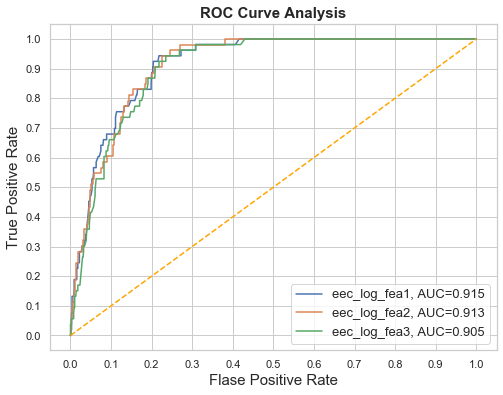

In [137]:
# plot ROC
# eec9 is slighly better than the other two models, we probabaly choose eec9
# However, if we want to have a 100% recall, eec3 is better than other two
# since it has the lowest FPR when the recall is 100% 
# in this case, we choose the eec since it has the highest AUC
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [145]:
y_score1=eec1.decision_function(X_test[model1select_fea])
y_score2=eec2.decision_function(X_test[model2select_fea])
y_score3=eec3.decision_function(X_test[model3select_fea])


ValueError: setting an array element with a sequence.

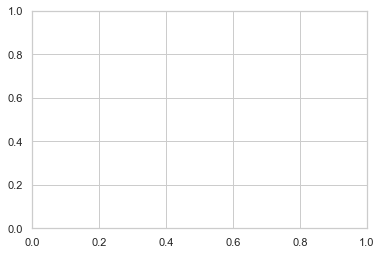

In [143]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import pylab as pl

precisions = []
recalls = []
average_precisions=[]
y_scores=[y_score1,y_score2,y_score3]
for y_score in y_scores:
    precision, recall, _= precision_recall_curve(y_test,y_score)
    precisions.append(precision)
    recalls.append(recall)
# Plot Precision-Recall curve
pl.clf()
pl.plot(recalls, precisions, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.legend(loc="lower left")
pl.show()

In [ ]:
# Plot Precision-Recall curve
pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
pl.legend(loc="lower left")
pl.show()

# Findings of the 3 models:

In [146]:
# get the coef of each features
coefs = []
for pipeline in eec2.estimators_:
    coefs.append(pipeline[1].coef_)
coefs = np.array(coefs).mean(axis=0)
coefs

array([[ 3.70330916,  0.8471643 ,  0.58443731,  0.77242282,  0.46233629,
         0.62651731, -0.34843926,  0.33043654,  0.58959712, -0.44666361,
         0.46914452]])

In [147]:
pd.DataFrame({'features':model2select_fea,'coef':list(coefs.ravel())})

,features,coef
0,Age,3.703309
1,CVD,0.847164
2,Diabetes,0.584437
3,Hypertension,0.772423
4,LDL,0.462336
5,PVD,0.626517
6,BMI,-0.348439
7,Female,0.330437
8,Weight,0.589597
9,Total.Chol,-0.446664


In [ ]:
## 根据这个project的任务是找到能实现predict CKD准确性尽可能高的model：
## 我选择了model-2, 结果用到11个features, 我觉得这个features是不是找的太多了？
## 我也研究了Aaron老师的码，发现可以通过coef比较小的放弃掉一部分feature让模型尽可能的简单，但是根据我一上出来的结论，我的coef出来有负值，并不是很清楚要怎么放弃不太significant的features